# IA08

## Objective

The data for this assignment has been extracted from publicly available data from LendingClub.com (see: https://www.lendingclub.com/info/download-data.action). 

Lending Club connects borrowers with investors. LendingCompany revenue increases as more money is lent, and decreases as the rate of default on these loans increases.

Our objective is to create a predictive model (using decision tree modeling as discussed in last class) that will assist LendingClub in determining who they should approve for loans. 

To simplify this analysis, I have extracted a sample of the data available. I have also cleaned and selected a subset of 5 of the 111 features found within the data set. I have also split the data into a training set, and a testing set (see data_splitter.ipynb). 

In this notebook we build two models, each using 5 inputs to predice one target (output):

input:
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dtai: The debt-to-annual-income ratio of the borrower 
* fico: The credit score of the borrower.
* inq.last.6mths: Number of inquiries made by creditors on the borrowers credit record in the last 6 months.
* delinq.2yrs: The number of times the borrower has been 30+ days past due on a loan payment in the past 2 years.

target:
* default: indicates that not all of money lent was returned by the borrower within the term of the loan

**Your task for IA08 is to complete the Recommendations section (the last section of this notbook). In this section you must discuss the performance of the two models and make a justified recommendation for which of the two developed models LendingClub should consider using to evaluate future loans**. 

__NOTE__: This notebook is provided without output. Therefore, you will need to run the entire notebook before starting your analysis. 

## Load and explore our sample data set

In [1]:
import pandas as pd
train_df = pd.read_csv('loan_data_train.csv')
test_df = pd.read_csv('loan_data_test.csv')

## Now, let's create a decision tree from our sample

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz

model_1 = DecisionTreeClassifier(max_depth=25)
model_2 = DecisionTreeClassifier(max_depth=50)
inp_1 = train_df[["log.annual.inc", "dtai", "fico", "inq.last.6mths", "delinq.2yrs"]]
tar_1 = [row == 1 for row in train_df['default']]
inp_2 = test_df[["log.annual.inc", "dtai", "fico", "inq.last.6mths", "delinq.2yrs"]]
tar_2 = [row == 1 for row in test_df['default']]

# tar = adata[['not.fully.paid']]
model_1 = model_1.fit(inp_1, tar_1)
model_2 = model_2.fit(inp_1, tar_1)

## Measuring performance of our models

In [3]:
from sklearn.metrics import confusion_matrix

In [4]:
## NOTE: The following function is not my own. This was adapted from ??? (need to add reference)

import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
        thresh = cm.max() / .80
    else:
        print('Confusion matrix, without normalization')
        thresh = cm.max() / 1.5

    print(cm)


    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[4016    2]
 [  48  723]]


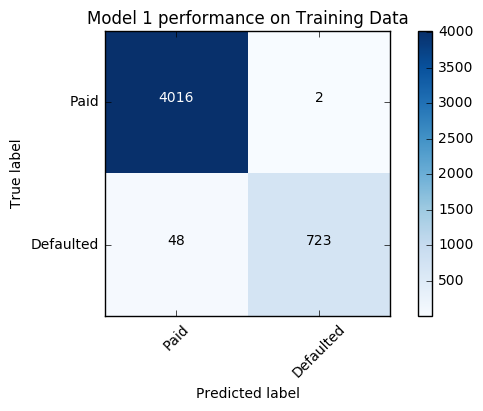

In [5]:
pred1 = model_1.predict(inp_1)
cnf_1_matrix = confusion_matrix(tar_1, pred1)
plt.figure()
plot_confusion_matrix(cnf_1_matrix, classes=['Paid', 'Defaulted'], title='Model 1 performance on Training Data')

Confusion matrix, without normalization
[[4018    0]
 [   0  771]]


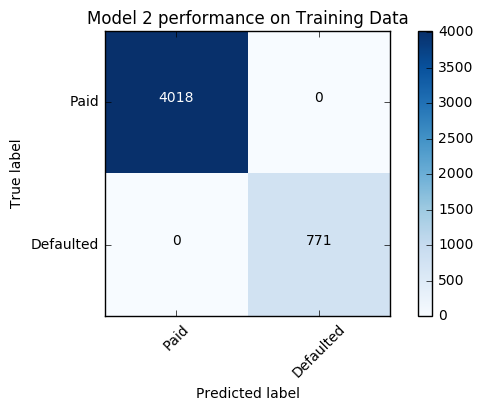

In [6]:
pred2 = model_2.predict(inp_1)
cnf_2_matrix = confusion_matrix(tar_1, pred2)
cnf_2_matrix
plt.figure()
plot_confusion_matrix(cnf_2_matrix, classes=['Paid', 'Defaulted'], title='Model 2 performance on Training Data')

Confusion matrix, without normalization
[[3402  625]
 [ 619  143]]


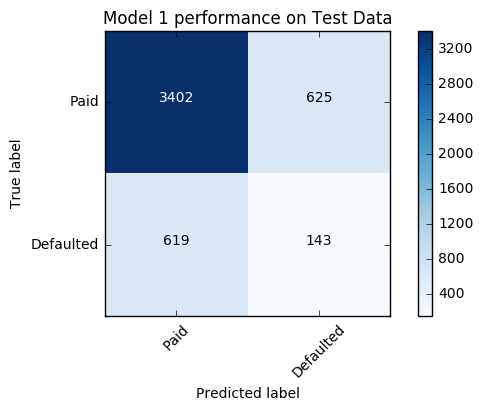

In [7]:
plt.figure()
pred3 = model_1.predict(inp_2)
cnf_3_matrix = confusion_matrix(tar_2, pred3)
plot_confusion_matrix(cnf_3_matrix, classes=['Paid', 'Defaulted'], title='Model 1 performance on Test Data')

Confusion matrix, without normalization
[[3355  672]
 [ 602  160]]


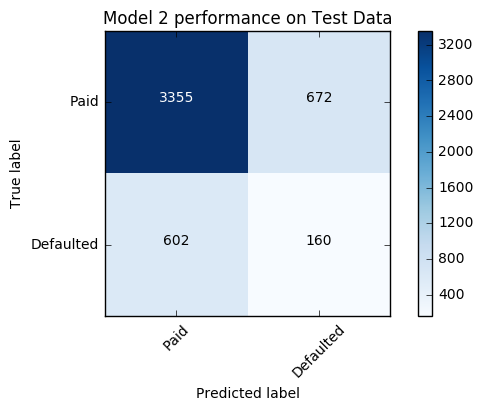

In [8]:
plt.figure()
pred4 = model_2.predict(inp_2)
cnf_4_matrix = confusion_matrix(tar_2, pred4)
plot_confusion_matrix(cnf_4_matrix, classes=['Paid', 'Defaulted'], title='Model 2 performance on Test Data')

### Recommendations

Using model performance measures discussed in the last lecture, describe and discuss the performance of each model.  

Based on your findings, justify which is the more appropirate model for LendingClub to use.
